In [1]:
def read_smiles_from_file(pathfile: str):
    with open(pathfile) as file:
        return [line.rstrip() for line in file]

In [2]:
guacm_smiles = "/home/nobilm@usi.ch/master_thesis/guacamol/guacamol_v1_train.smiles"
smiles = read_smiles_from_file(guacm_smiles)

In [6]:
from collections import Counter
from rdkit import Chem

c = Counter()
cc = Counter()


def get_atoms_info(mols):
    atoms = set()
    max_num = 0
    for num_mol, m in enumerate(mols):
        if m.GetNumAtoms() > max_num: max_num = m.GetNumAtoms()

        atom_types = [atom.GetSymbol() for atom in m.GetAtoms()]
        bond_types = [bond.GetBondType() for bond in m.GetBonds()]

        c.update(atom_types)
        cc.update(bond_types)
        
        for atom in atom_types:
            atoms.add(atom)
        
    atom2num = {}
    for i, atomType in enumerate(atoms):
        atom2num[str(atomType)] = i

    num2atom = {v:k for k,v in atom2num.items()}
    print("TOTAL NUM OF MOLS: ", num_mol)
    return atom2num, num2atom, max_num

In [5]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles]

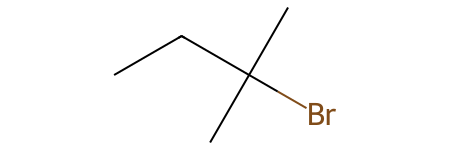

In [23]:
mols[0]

In [27]:
Chem.MolFromSmiles("cccccc-cccccCC1C2C(C)N12")

[17:21:48] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10


In [7]:
atom2num, num2atom, max_num = get_atoms_info(mols)

TOTAL NUM OF MOLS:  1273103


In [22]:
for k,v in c.items(): print(k, 1000000/v)


C 0.03805769363678407
Br 16.347081228646626
N 0.2521717662942678
O 0.2571374939894111
S 1.9962749509415432
Cl 3.4266994716029413
F 2.004610604390097
P 46.948356807511736
I 122.63919548687761
B 469.4835680751174
Si 519.2107995846313
Se 713.2667617689016


In [21]:
for k,v in cc.items(): print(k, 10000000/v)


SINGLE 0.5474413794296493
AROMATIC 0.561455769468956
DOUBLE 4.079857498737284
TRIPLE 117.53505483010308
